In [1]:
from keras.layers import Input, Dense
from keras.models import Sequential, Model
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [3]:
X = data[:, 2:] / 255

In [4]:
def get_adam():
    return Adam(lr=.0001, beta_1=.5)

In [5]:
def get_generator():
    adam = get_adam()
    model = Sequential()
    model.add(Dense(128, input_dim=50, activation="relu"))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(512, activation="relu"))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(784, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer=adam)
    
    return model

In [7]:
def get_discriminator():
    adam = get_adam()
    model = Sequential()
    model.add(Dense(512, input_dim=784, activation="relu"))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy", optimizer=adam)
    
    return model

In [9]:
def get_gan(generator, discriminator):
    adam = get_adam()
    in_gan = Input(shape=(50,))
    layer_1 = generator(in_gan)
    out_gan = discriminator(layer_1)
    
    model = Model(inputs=[in_gan], outputs=[out_gan])
    model.compile(loss="binary_crossentropy", optimizer=adam)
    
    return model
    

In [11]:
generator = get_generator()
discriminator = get_discriminator()
gan = get_gan(generator, discriminator)
batch_size = 2000

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoches done 0


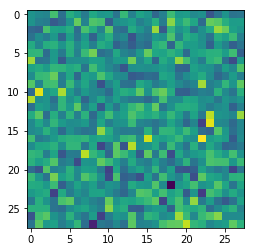

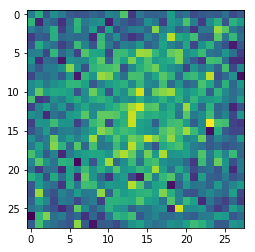

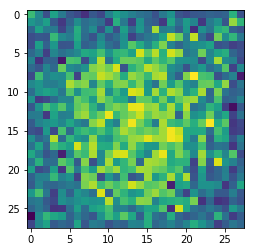

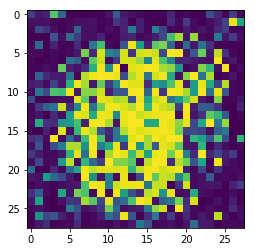

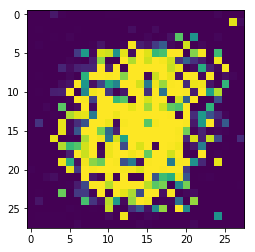

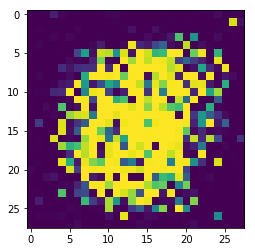

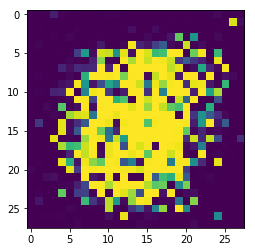

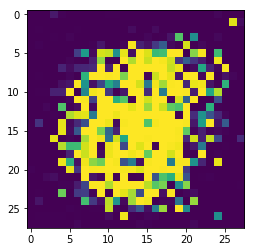

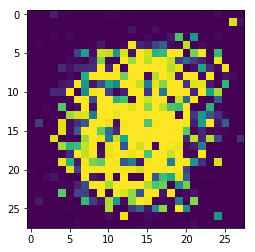

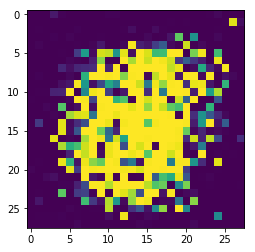

epoches done 1


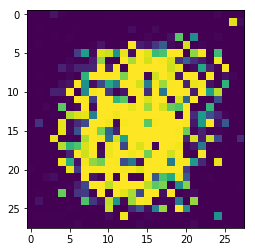

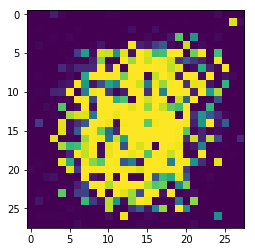

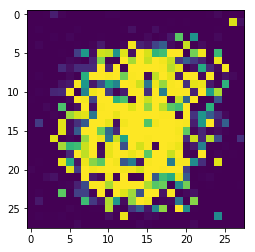

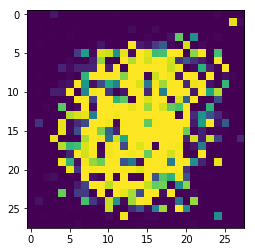

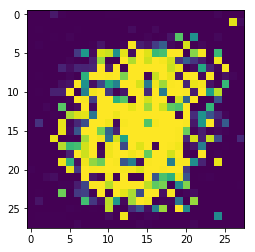

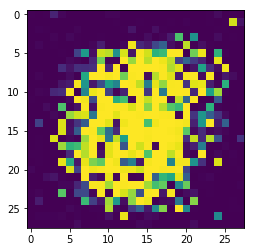

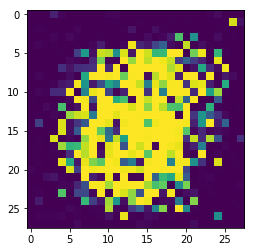

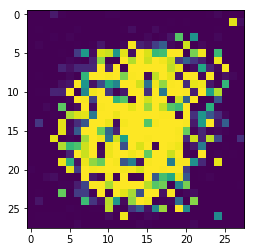

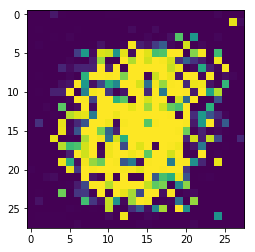

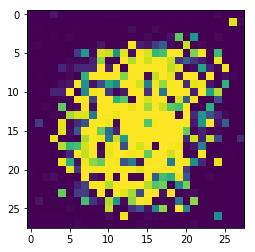

epoches done 2


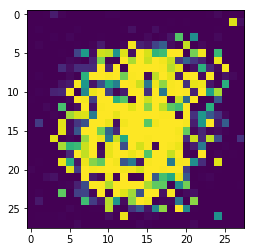

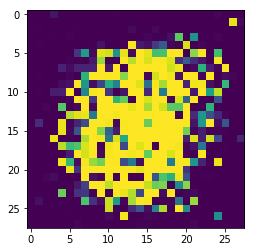

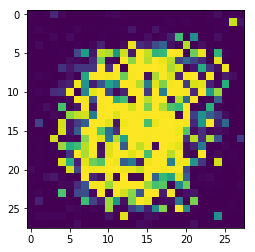

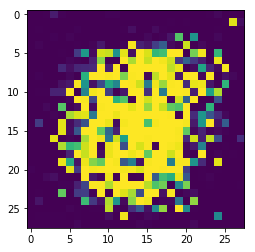

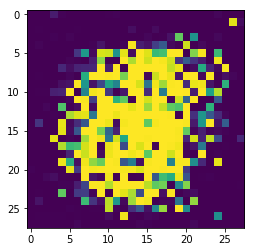

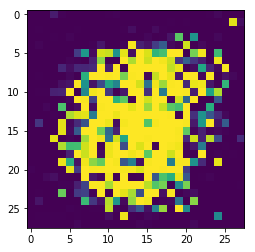

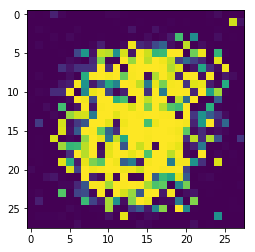

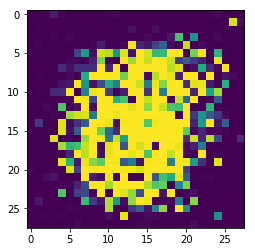

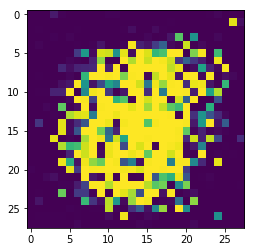

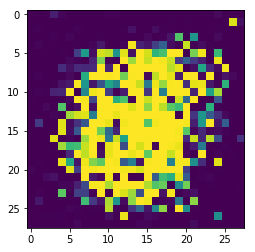

epoches done 3


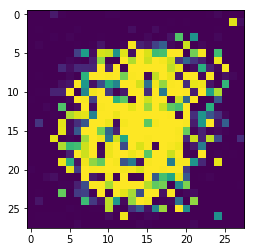

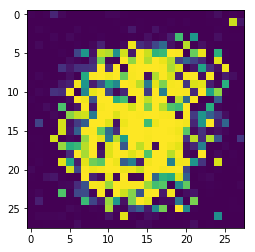

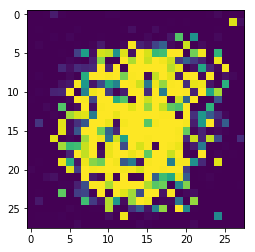

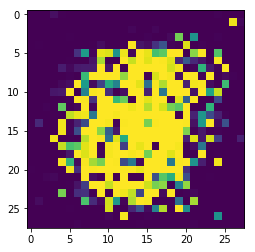

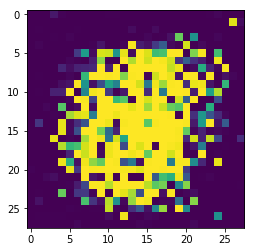

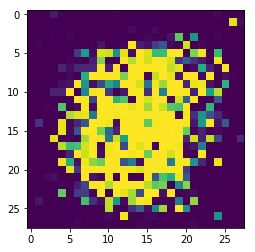

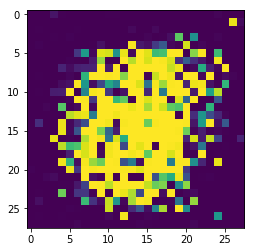

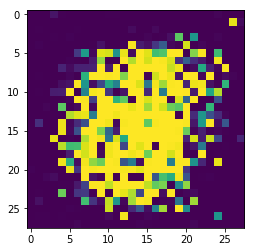

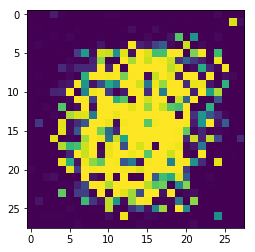

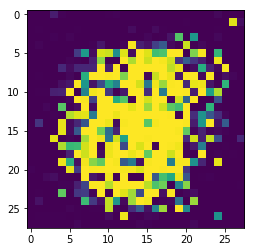

epoches done 4


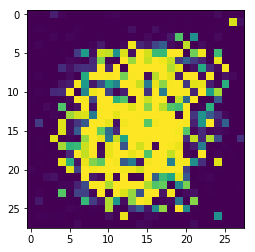

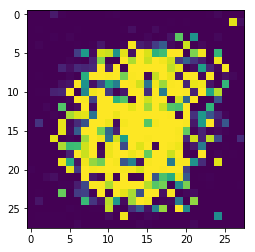

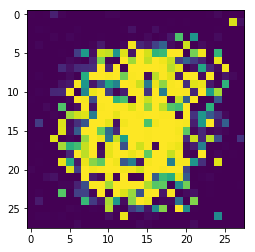

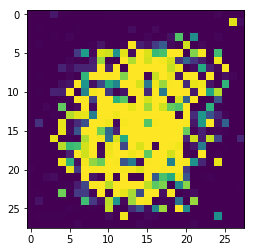

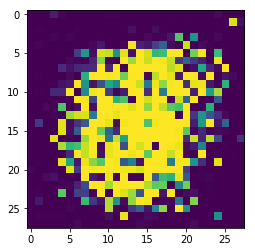

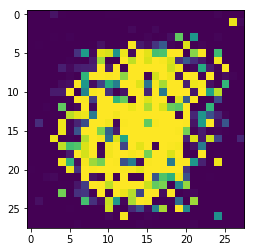

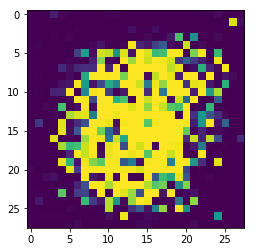

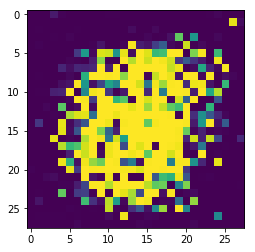

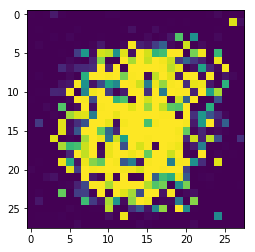

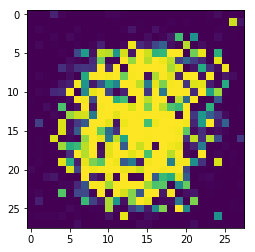

epoches done 5


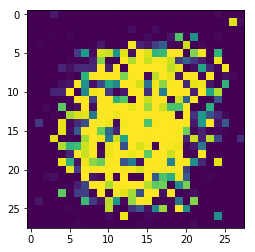

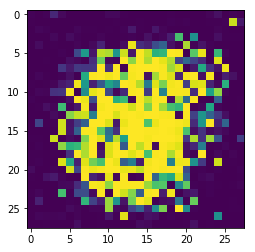

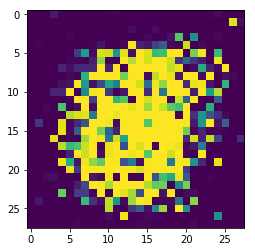

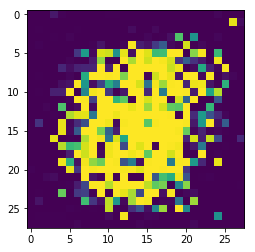

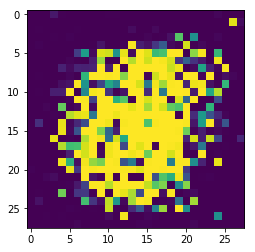

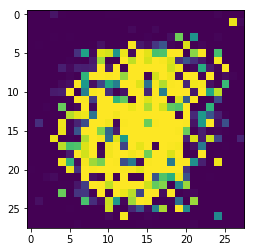

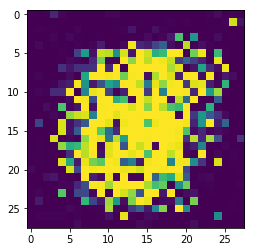

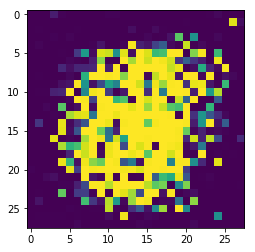

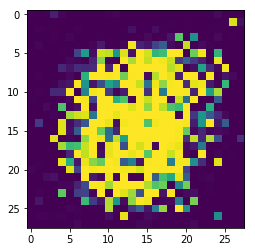

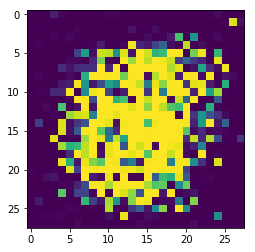

epoches done 6


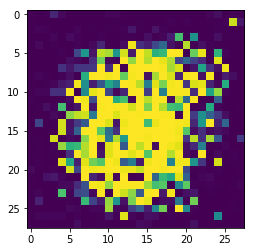

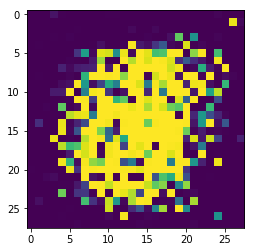

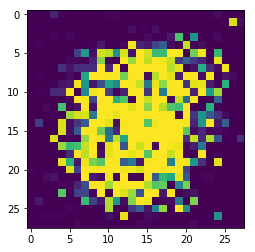

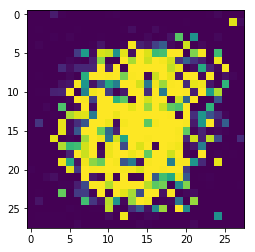

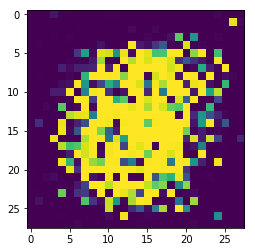

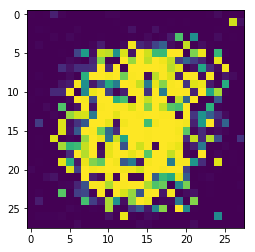

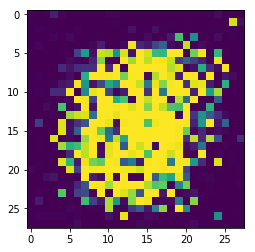

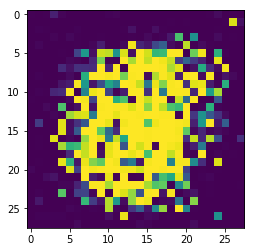

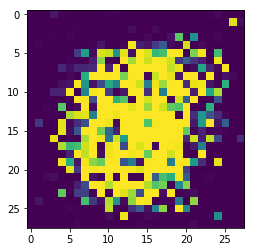

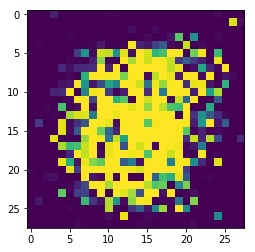

epoches done 7


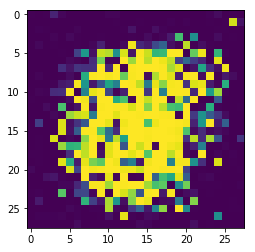

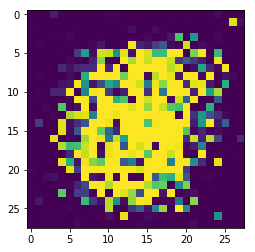

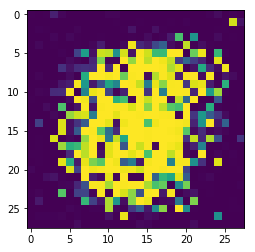

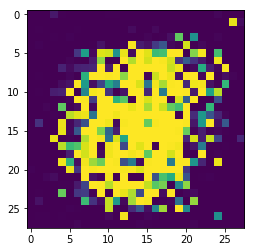

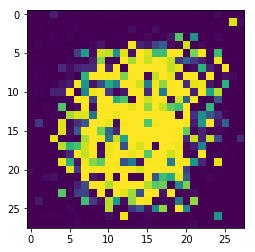

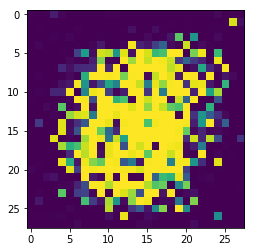

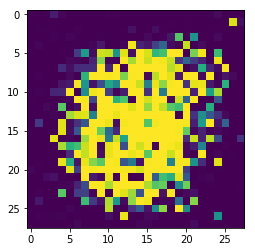

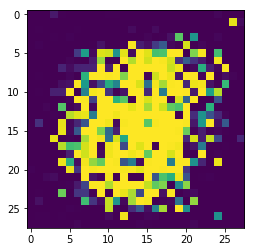

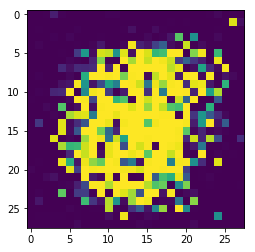

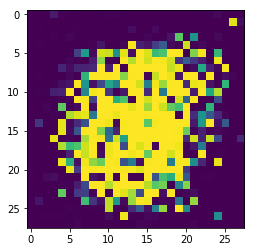

epoches done 8


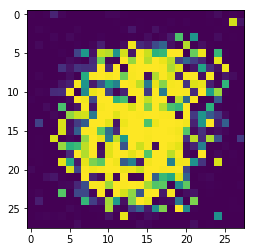

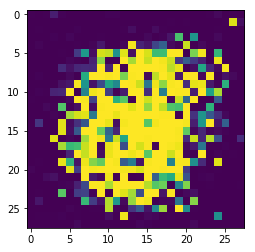

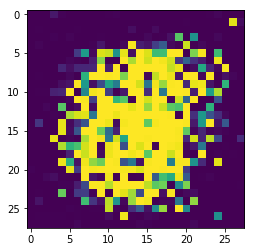

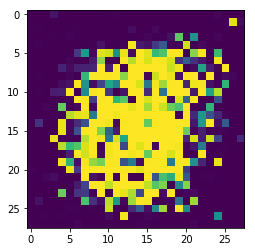

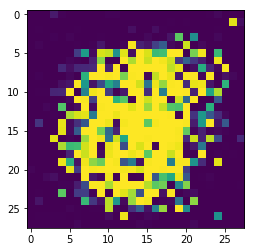

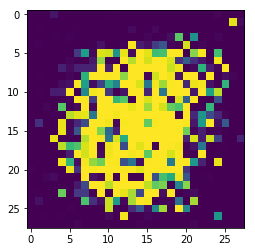

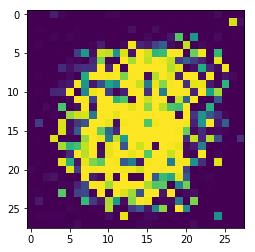

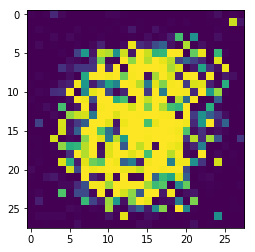

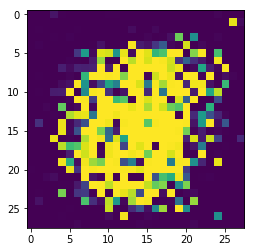

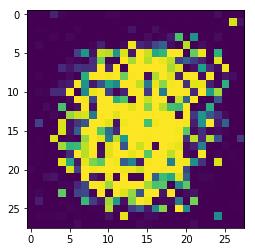

epoches done 9


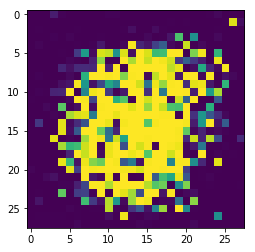

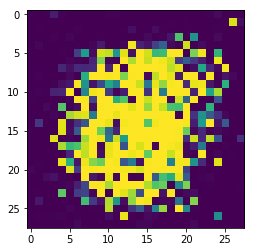

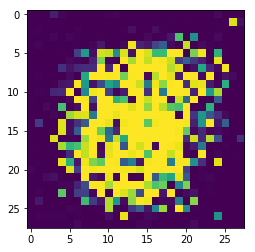

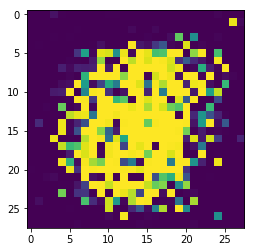

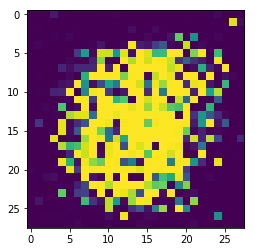

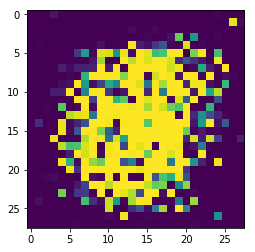

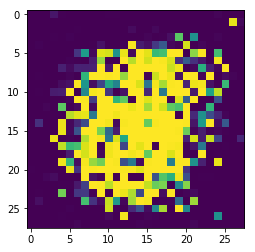

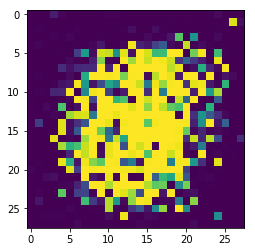

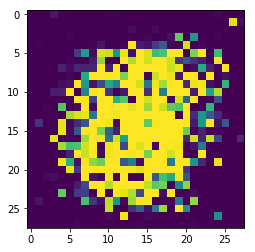

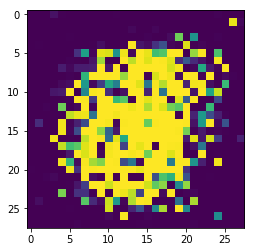

In [12]:
for i in range(100):
    reals = X[np.random.randint(0, len(X), batch_size)]
    noises = np.random.uniform(size=(batch_size, 50))
    
    fakes = generator.predict(noises)
    
    total = np.vstack([reals, fakes])
    y = np.zeros([2*batch_size, 1])
    y[: batch_size] = 1
    
    discriminator.trainable = True
    
    discriminator.fit(total, y, verbose=0)

    discriminator.trainable = False
    
    gan.fit(noises, np.ones([batch_size, 1]), verbose=0)
    
    if i%10 == 0:
        print("epoches done", i//10)
        
    plt.figure()
    plt.imshow(fakes[0].reshape(28, 28))
    plt.show()


In [ ]:
noises = np.random.uniform(size=(10, 50))

In [ ]:
fakes = generator.predict(noises)

In [13]:
Adam?